In [9]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option('future.no_silent_downcasting', True)

titanic_data = pd.read_csv('train.csv')
titanic_data

# making  a copied dataset to do correlations on it 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
clean_data = titanic_data.copy()
clean_data = clean_data.join(pd.get_dummies(clean_data.Embarked,dtype=int)).drop(['Embarked'],axis=1)
clean_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
clean_data['Sex'] =  clean_data['Sex'].replace(['female','male'],[0,1] )
clean_data['Female'] = np.absolute(clean_data['Sex'] - 1)
clean_data['Male'] = np.absolute(clean_data['Sex'])
clean_data = clean_data.drop(['Sex'] , axis=1)
clean_data

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,NaN,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


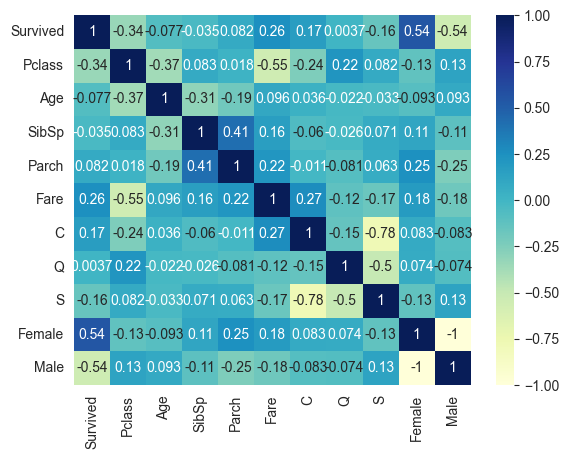

Survived    1.000000
Pclass      0.338481
Age         0.077221
Name: Survived, dtype: float64

In [4]:
sns.heatmap(clean_data.corr(),annot=True,cmap='YlGnBu')

data = clean_data.corr()['Survived']
data = np.absolute(data)
# data.drop(index=0, inplace=True)
data.sort_values()
plt.show()  #show correlation heat map
data = data[:3]
data  #finding most 3 revelent fetures for next step 

In [5]:
from  sklearn.model_selection import StratifiedShuffleSplit
 #shuffle and split for training model
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index ,test_index in sss.split(clean_data,clean_data[["Survived","Male","Female","Pclass"]]):
    start_train_set = clean_data.loc[train_index]
    start_test_set = clean_data.loc[test_index]
  

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 180 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       569 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   C         712 non-null    int64  
 7   Q         712 non-null    int64  
 8   S         712 non-null    int64  
 9   Female    712 non-null    object 
 10  Male      712 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 66.8+ KB


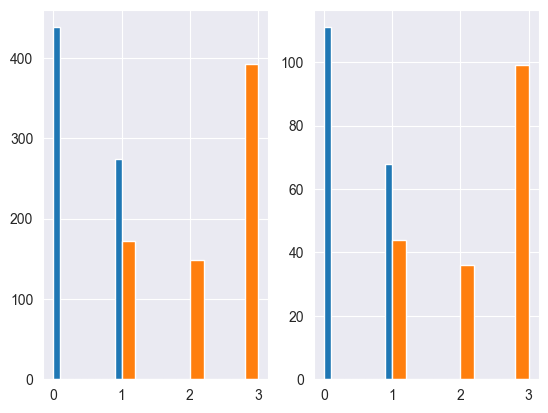

In [6]:
plt.subplot(1,2,1)
start_train_set['Survived'].hist()
start_train_set['Pclass'].hist()
# start_train_set['Sex'].hist()
plt.subplot(1,2,2)
start_test_set['Survived'].hist()
start_test_set['Pclass'].hist()
# start_test_set['Sex'].hist()
start_train_set.info()


In [7]:
from  sklearn.base import BaseEstimator, TransformerMixin
from  sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return  self
    
    def transform(self, X):
        X = X.copy()
        imputer = SimpleImputer( strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
    def make(self):
        pass    
        

In [16]:
from sklearn.pipeline import  Pipeline

age_iputer = AgeImputer()

start_train_set = age_iputer.fit_transform(start_train_set) 
pipeline = Pipeline([("age_imputer",AgeImputer())])
start_train_set =  pipeline.fit_transform(start_train_set)
start_test_set = pipeline.fit_transform(start_test_set)
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 180 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   C         712 non-null    int64  
 7   Q         712 non-null    int64  
 8   S         712 non-null    int64  
 9   Female    712 non-null    object 
 10  Male      712 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 66.8+ KB


In [18]:
from  sklearn import linear_model
start_train_set_X , start_train_set_Y = start_train_set.drop(['Survived'],axis=1), start_train_set['Survived']
start_test_set_X , start_test_set_Y = start_test_set.drop(['Survived'],axis=1), start_test_set['Survived']


logr = linear_model.LogisticRegression()

logr.fit(start_train_set_X,start_train_set_Y)
logr.score(start_test_set_X,start_test_set_Y)



D:\Programing\Jupyter\Titanic survivors\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776536312849162